## Observations and Insights 

1. Average Tumor size is strongly correlated with weight based on correlation coefficient of 0.84, indicating that weight is a factor in tumor size
2. Capomulin and Ramicane pretty clearly outperform Infubinol and Ceftamin in decreasing tumor size based on the box plot of tumor volume
3. Capomulin exhibits a similar correlation of average Tumor size to weight as the overall data set.

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = mouse_metadata.merge(study_results, on='Mouse ID', how='outer')
# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [84]:
# Checking the number of mice.
mouse_count = len(pd.unique(mouse_df['Mouse ID']))
mouse_count

249

In [85]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dupe_df = mouse_df[mouse_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
dupe_mouse_ID = mouse_dupe_df.at[mouse_dupe_df.index[1],'Mouse ID']
dupe_mouse_ID


'g989'

In [86]:
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [87]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_df = mouse_df.loc[mouse_df["Mouse ID"] != dupe_mouse_ID]
mouse_clean_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [88]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(pd.unique(mouse_clean_df['Mouse ID']))
mouse_count

248

## Summary Statistics

In [89]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# reduce df down to just tumor volume. Likely a better way to do this.
mouse_tumor_df = mouse_clean_df.drop(mouse_clean_df.columns[[3, 4, 5, 7]], axis=1)
summary_stats_df = mouse_tumor_df.groupby('Drug Regimen').describe()
summary_stats_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  148.0  52.320930  6.622085  45.000000  46.894328   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.446266  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Measurements by Regimen'}, xlabel='Drug Regimen'>

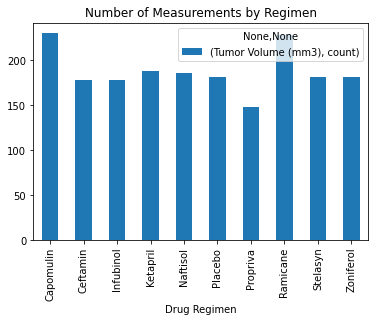

In [90]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# reducing the DF to just needed columns. Probably a better way to do this.
num_reg_df = summary_stats_df.drop(summary_stats_df.columns[[1, 2, 3, 4, 5, 6, 7]], axis=1)
num_reg_df.plot(kind="bar",title='Number of Measurements by Regimen')



In [91]:
list(num_reg_df.columns) 

[('Tumor Volume (mm3)', 'count')]

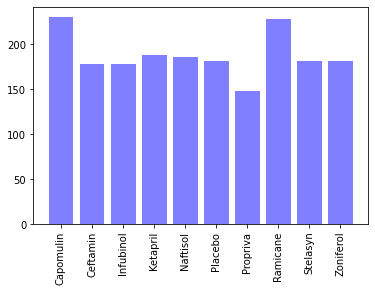

In [92]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(num_reg_df))
y_axis = num_reg_df[('Tumor Volume (mm3)', 'count')].to_list()               #I don't understand why I can't just access count directly here??  
tick_locations = [value for value in x_axis]
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, num_reg_df.index, rotation="vertical")
plt.show()

<AxesSubplot:ylabel='Sex'>

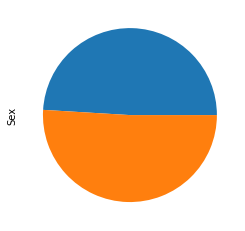

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = mouse_clean_df.groupby('Sex')
count_sex = sex_group['Sex'].count()
labels = ['Female', 'Male']                                                         ###
sex_chart = count_sex.plot(kind='pie', labels=labels, textprops={'color':"w"})
sex_chart



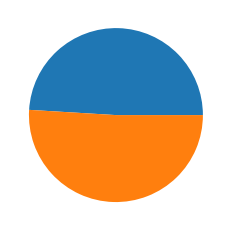

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_group = mouse_clean_df.groupby('Sex')
count_sex = sex_group['Sex'].count()
labels = ['Female', 'Male']
plt.pie(count_sex, labels=labels, textprops={'color':"w"})
plt.show()

## Quartiles, Outliers and Boxplots

In [95]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_last_time = mouse_clean_df.groupby('Mouse ID')['Timepoint'].max()
#convert series to data frame. Best way to do this?
mouse_last_time = mouse_last_time.to_frame()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_last_tumor = mouse_last_time.merge(mouse_clean_df, how='left', on=['Mouse ID','Timepoint'])
mouse_last_tumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [96]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#filtering down the df to the treatment Regimens of interest
mouse_last_tumor_4 = mouse_last_tumor[mouse_last_tumor['Drug Regimen'].isin(Treatments)]

# Create empty list to fill with tumor vol data (for plotting)

quartiles = mouse_last_tumor_4['Tumor Volume (mm3)'].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of tumor volume for all 4 drugs is: {lowerq}")
print(f"The upper quartile of tumor volume for all 4 drugs is: {upperq}")
print(f"The interquartile range of tumor volume for all 4 drugs is: {iqr}")
print(f"The the median of tumor volume for all 4 drugs is: {quartiles[0.5]} ")

Capomulin_tumors = []
Ramicane_tumors = []
Infubinol_tumors = []
Ceftamin_tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes   
    # add subset     
    # Determine outliers using upper and lower bounds
    

The lower quartile of tumor volume for all 4 drugs is: 37.187743802499995
The upper quartile of tumor volume for all 4 drugs is: 59.930261755000004
The interquartile range of tumor volume for all 4 drugs is: 22.74251795250001
The the median of tumor volume for all 4 drugs is: 45.0 


In [97]:
for index, row in mouse_last_tumor_4.iterrows():
    if row['Drug Regimen'] == 'Capomulin':
        Capomulin_tumors.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Ramicane':
        Ramicane_tumors.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Infubinol':
        Infubinol_tumors.append(row['Tumor Volume (mm3)'])
    else: 
        Ceftamin_tumor.append(row['Tumor Volume (mm3)'])
        
Capomulin_tumors.sort()
Ramicane_tumors.sort()
Infubinol_tumors.sort()
Ceftamin_tumor.sort()

#putting lists in dictionary for plotting in same figure
Reg_dict = {'Capomulin':Capomulin_tumors, 'Ramicane': Ramicane_tumors, 'Infubinol': Infubinol_tumors, 'Ceftamin': Ceftamin_tumor }


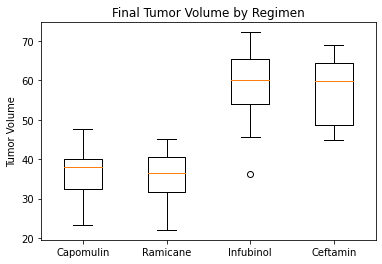

In [98]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Reg_dict.values())
ax1.set_xticklabels(Reg_dict.keys())
plt.show()

## Line and Scatter Plots

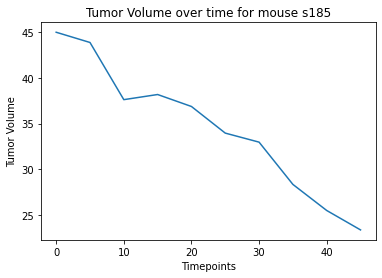

In [99]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_mouse_df = mouse_clean_df.loc[mouse_clean_df["Mouse ID"] == 's185']
timepoints = Capomulin_mouse_df['Timepoint'].to_list()
tumor_vol = Capomulin_mouse_df['Tumor Volume (mm3)'].to_list()
plt.plot(timepoints,tumor_vol)
plt.title('Tumor Volume over time for mouse s185')
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume')
plt.show()



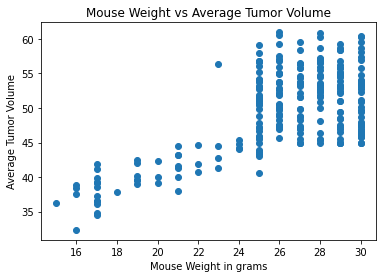

In [100]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Get average tumor volume by mouse with weight
mouse_avg_vol = mouse_clean_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
mouse_weight = mouse_clean_df.groupby(['Mouse ID'])['Weight (g)'].mean()


plt.scatter(mouse_weight,mouse_avg_vol, marker="o")
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Mouse Weight in grams')
plt.ylabel('Average Tumor Volume')
plt.show()


## Correlation and Regression

In [101]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen
Capomulin_df =  mouse_clean_df[(mouse_clean_df['Drug Regimen']=='Capomulin')]
mouse_avg_vol_Capomulin = Capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
mouse_weight_Capomulin = Capomulin_df.groupby(['Mouse ID'])['Weight (g)'].mean()
correlation = st.pearsonr(mouse_weight_Capomulin, mouse_avg_vol_Capomulin)
correlation
print(f'The correlation coefficient between mouse weight and average tumor volume for Capomulin is: {round(correlation[0],2)}')

The correlation coefficient between mouse weight and average tumor volume for Capomulin is: 0.84


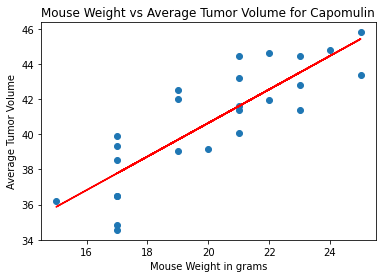

In [103]:
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(mouse_weight_Capomulin,mouse_avg_vol_Capomulin, marker="o")
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin')
plt.xlabel('Mouse Weight in grams')
plt.ylabel('Average Tumor Volume')
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight_Capomulin, mouse_avg_vol_Capomulin)
regress_values = mouse_weight_Capomulin * slope + intercept
plt.plot(mouse_weight_Capomulin,regress_values,"r-")
plt.show()
